## This draft contains reading of database properly

In [658]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [659]:
import re

from os import walk
from os.path import join

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow, show

In [660]:
# Read classes from file
labels = np.genfromtxt('../classes.csv', delimiter=',', dtype=str)
# because of space after comma we read redundant empty column
labels = np.array([l[0] for l in labels])

In [661]:
data_path = "../database/"
files = list()
for (dirpath, dirnames, filenames) in walk(data_path):
    files = filenames    

In [662]:
data_images = list()
data_labels = list()
label_from_name = r"([a-zA-z]+)[-_]\d+.pgm"

In [663]:
# here we load all the images and find their label from filename
for f in files:
    match = re.match(label_from_name, f)
    if match:
        label = match.groups()[0]
        if label in labels:
            data_labels.append(label)
            data_images.append(imread(join(data_path, f), as_grey=True))      
    else: 
        # if name does not match our regexp or label is not in the list
        # of classes - not read from database
        continue 

In [664]:
im = data_images[0]

In [8]:
data_labels[0]

'key'

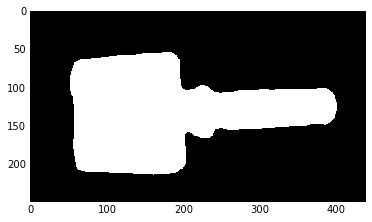

In [93]:
imshow(im)
show()

In [238]:
CONNECTIVITY_INC = {
    4: {
        0: (0, -1),
        1: (-1, 0),
        2: (0, 1),
        3: (1, 0)
    },
    8: {
        0: (0, -1),
        1: (-1, -1),
        2: (-1, 0),
        3: (-1, 1),
        4: (0, 1),
        5: (1, 1),
        6: (1, 0),
        7: (1, -1),
    }
}

In [101]:
def pad_image(im, color="b"):
    if color == "b":
        padded_im = np.array([np.concatenate([[0], row, [0]]) for row in im], dtype=np.uint8)
        new_row = np.zeros((1, padded_im.shape[1]), dtype=np.uint8)
        padded_im = np.concatenate([new_row, padded_im, new_row])
    else:
        raise ValueError("Padding is not implemented for thes color")
    return padded_im

In [616]:
def trace_border(im, connectivity=4):
    border = list()
    # we pad image by one pixel from all sides
    # padding ensures us not to go out of domain
    padded_im = pad_image(im)
    
    background_pixel = padded_im[0][0]
    current_pixel = padded_im[0][0]
    start = None
    
    # find starting pixel
    for i in range(padded_im.shape[0]):
        for j in range(padded_im.shape[1]):
            if padded_im[i][j] != current_pixel:
                start = (i, j)
                border.append((i, j))
                break
        else:
            continue 
            # executed if the loop ended normally (no break)
        break 
        
    # iterations of the algo
    print(start)
    current_pixel = start
    direction = 0
    print("Start iteration of the algorithm... ")
    while (True):
        if connectivity == 8:
            i = (direction + 2) % 8
            while i != (direction + 7) % 8:
                next_pixel = (current_pixel[0] + CONNECTIVITY_INC[connectivity][i][0],
                              current_pixel[1] + CONNECTIVITY_INC[connectivity][i][1])
                if padded_im[next_pixel] != background_pixel:
                    current_pixel = next_pixel
                    border.append(current_pixel)
                    BB.append(current_pixel)
                    direction = (i + 4) % 8
                    break
                i = (i+1) % 8
        elif connectivity == 4:
            i = (direction + 1) % 4
            while i != (direction + 4) % 8:
                next_pixel = (current_pixel[0] + CONNECTIVITY_INC[connectivity][i][0],
                              current_pixel[1] + CONNECTIVITY_INC[connectivity][i][1])
                if padded_im[next_pixel] != background_pixel:
                    current_pixel = next_pixel
                    border.append(current_pixel)
                    BB.append(current_pixel)
                    direction = (i + 2) % 4
                    break
                i = (i+1) % 4
        else:
            raise ValueError("Invalid connectivity specified")
    # stop condition 
        if current_pixel == border[0]:
            break
            
    # remove padding from image (it will influence border coordinates)
    border = [(pixel[0] - 1, pixel[1] - 1) for pixel in border]
    
    return border

In [617]:
border = trace_border(im, connectivity=4)

(56, 173)
Start iteration of the algorithm... 


In [629]:
im1 = data_images[1]

In [630]:
border = trace_border(data, connectivity=4)

(61, 251)
Start iteration of the algorithm... 


In [563]:
im.shape

(248, 438)

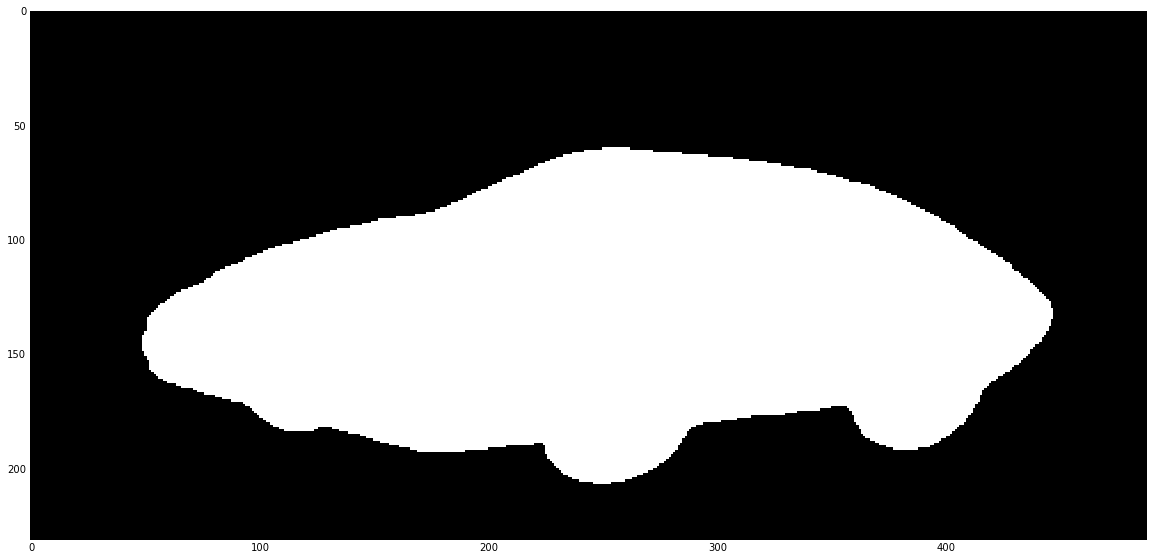

In [665]:
car = data_images[1]
imshow(car)

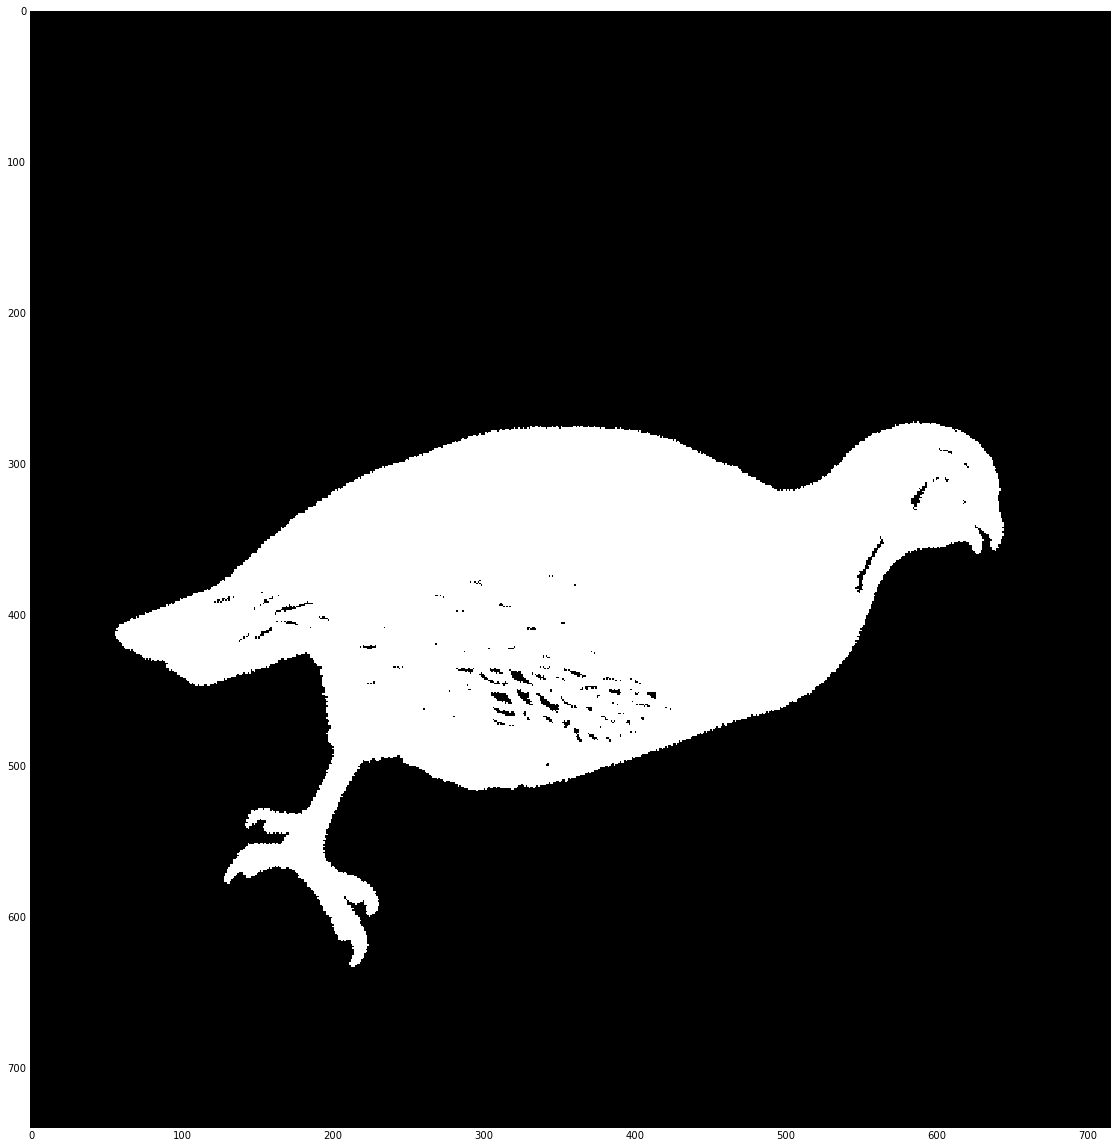

In [679]:
bird = data_images[3]
imshow(bird)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

(273, 585)
Start iteration of the algorithm... 
Now find inside points...


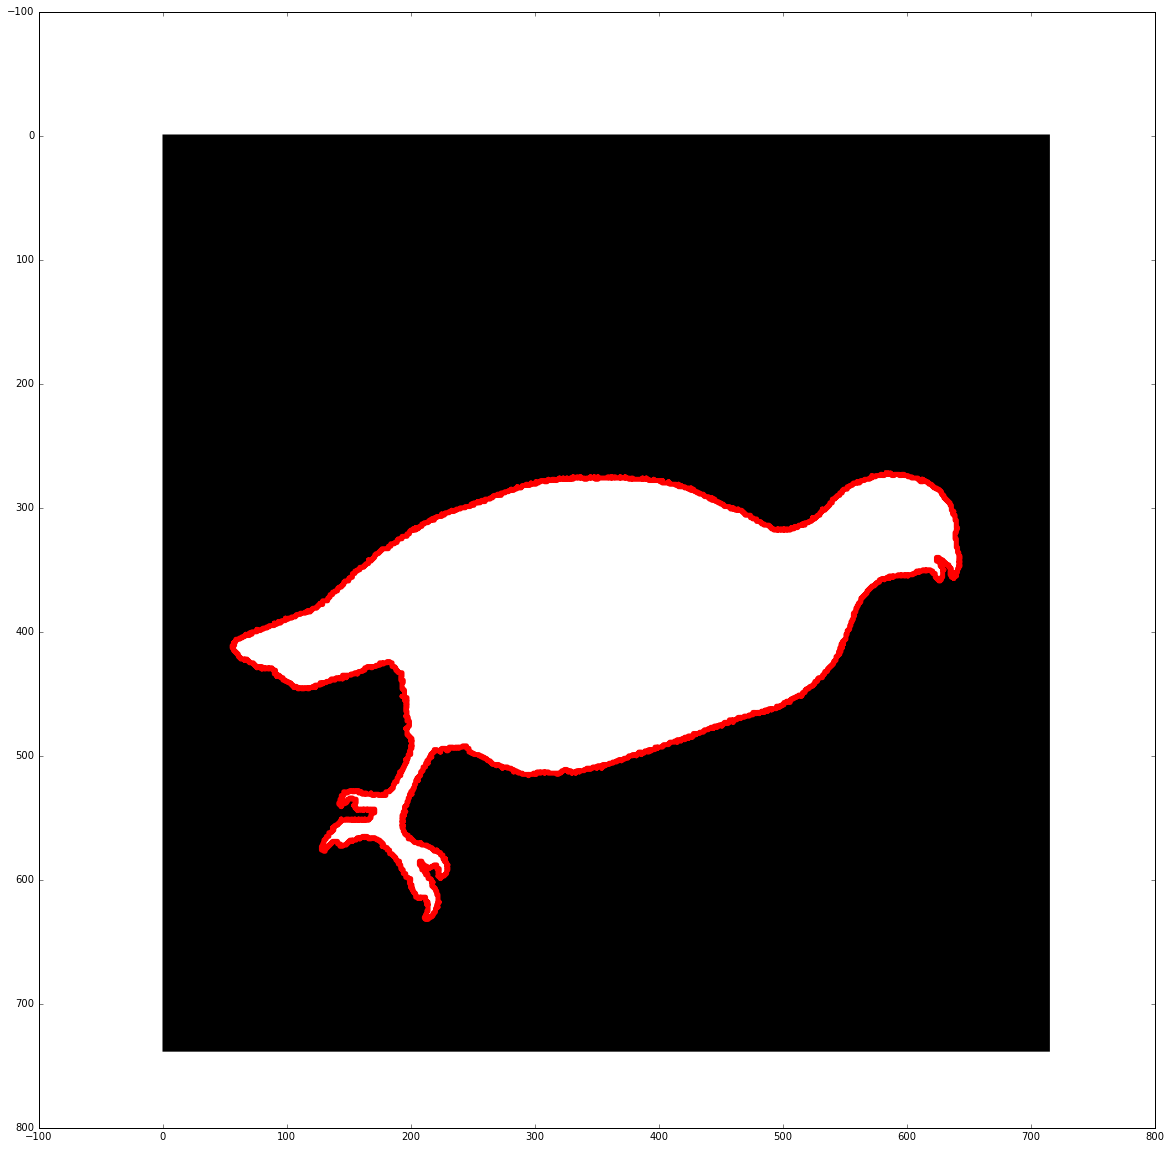

In [686]:
sp = (300,400)

def add_point_inside(im, border, point):
    image = numpy.array(im)
    next_points = [point]
    
    while len(next_points) > 0:
        point = next_points.pop()
        image[point] = 120
        
        top = (point[0]-1, point[1])
        down = (point[0]+1, point[1])
        left = (point[0], point[1]-1)
        right = (point[0], point[1]+1)
        
        if image[top] != 120 and top not in border:
            next_points.append(top)
        if image[down] != 120 and down not in border:
            next_points.append(down)
        if image[left] != 120 and left not in border:
            next_points.append(left)
        if image[right] != 120 and right not in border:
            next_points.append(right)
        
    return image

def make_grey_white(im):
    im[im > 0] = 255
            
border = trace_border(bird, connectivity=4)

print("Now find inside points...")
new_im = bird
new_im = add_point_inside(new_im, border, sp)
make_grey_white(new_im)

width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(new_im, cmap=plt.cm.gray)

ax.plot([b[1] for b in border], [b[0] for b in border], color="r", linewidth=5)

In [615]:
border = trace_border(im4, connectivity=4)


(151, 101)
Start iteration of the algorithm... 


KeyboardInterrupt: 

In [279]:
len(border)

1073

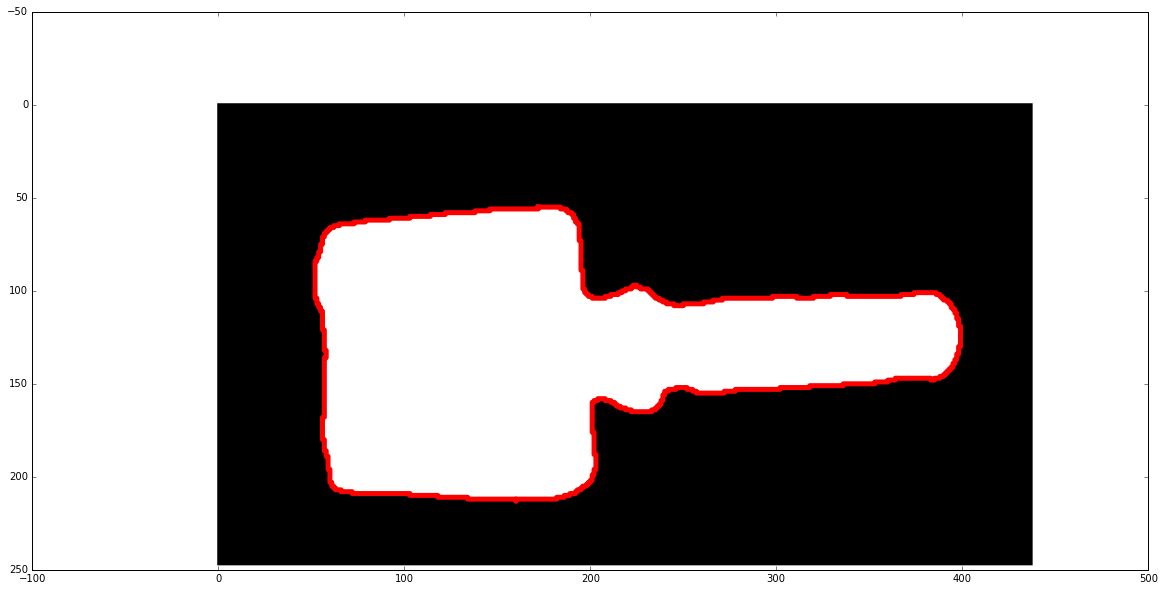

In [298]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)

ax.plot([b[1] for b in border], [b[0] for b in border], color="r", linewidth=5)

In [303]:
vectors = {}
for pixel in border:
    vectors.update({ pixel: []})
    for other_pixel in border:
        if other_pixel != pixel:
            vectors[pixel].append((other_pixel[0] - pixel[0],
                                   other_pixel[1] - pixel[1]))

In [307]:
pixel1_x = [vector[0] for vector in vectors[border[0]]]
pixel1_y = [vector[1] for vector in vectors[border[0]]]

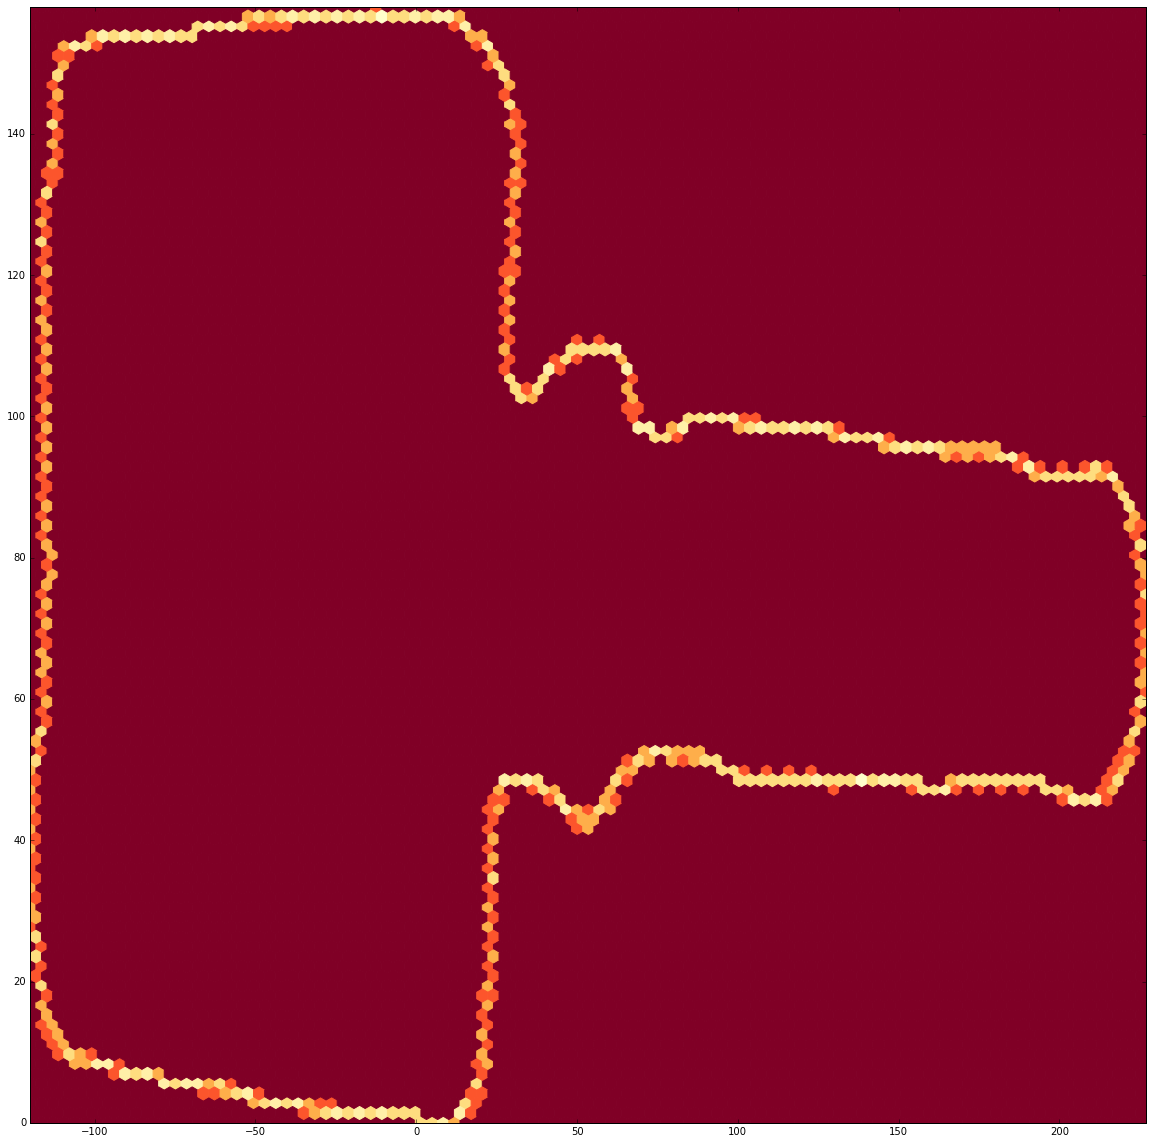

In [317]:
plt.hexbin(pixel1_y, pixel1_x, bins='log', cmap=plt.cm.YlOrRd_r)
plt.figure(figsize=(4,4))
show()

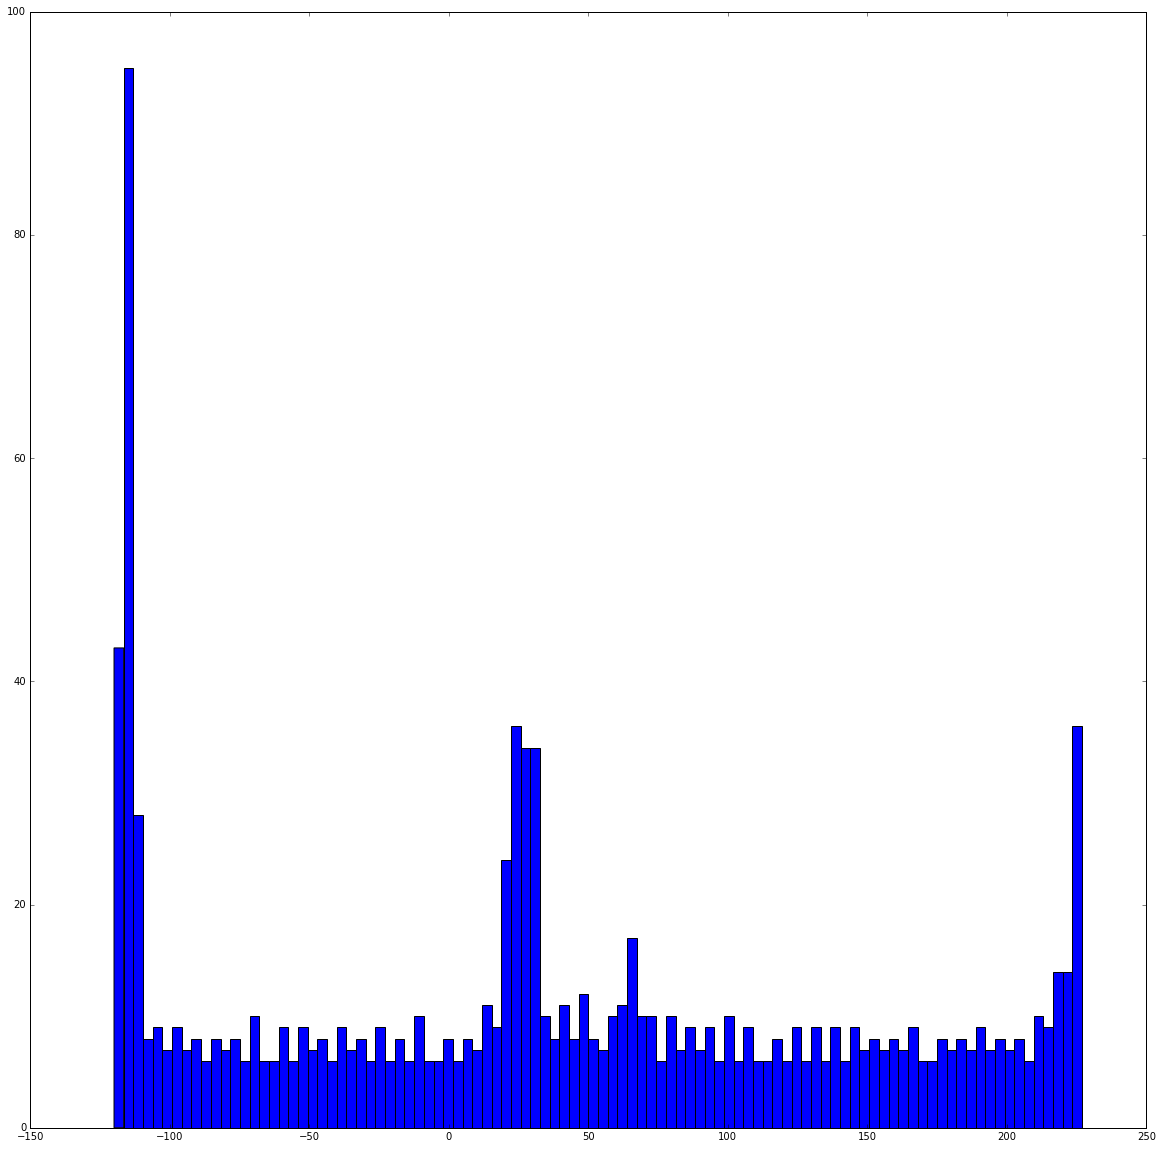

In [313]:
plt.hist(pixel1_y, bins=100)
show()

In [319]:
import skfmm
phi = np.ones((3, 3))
phi[1, 1] = -1
skfmm.distance(phi)

array([[ 1.20710678,  0.5       ,  1.20710678],
       [ 0.5       , -0.35355339,  0.5       ],
       [ 1.20710678,  0.5       ,  1.20710678]])

In [344]:
d = skfmm.distance(im, dx=1e-2)

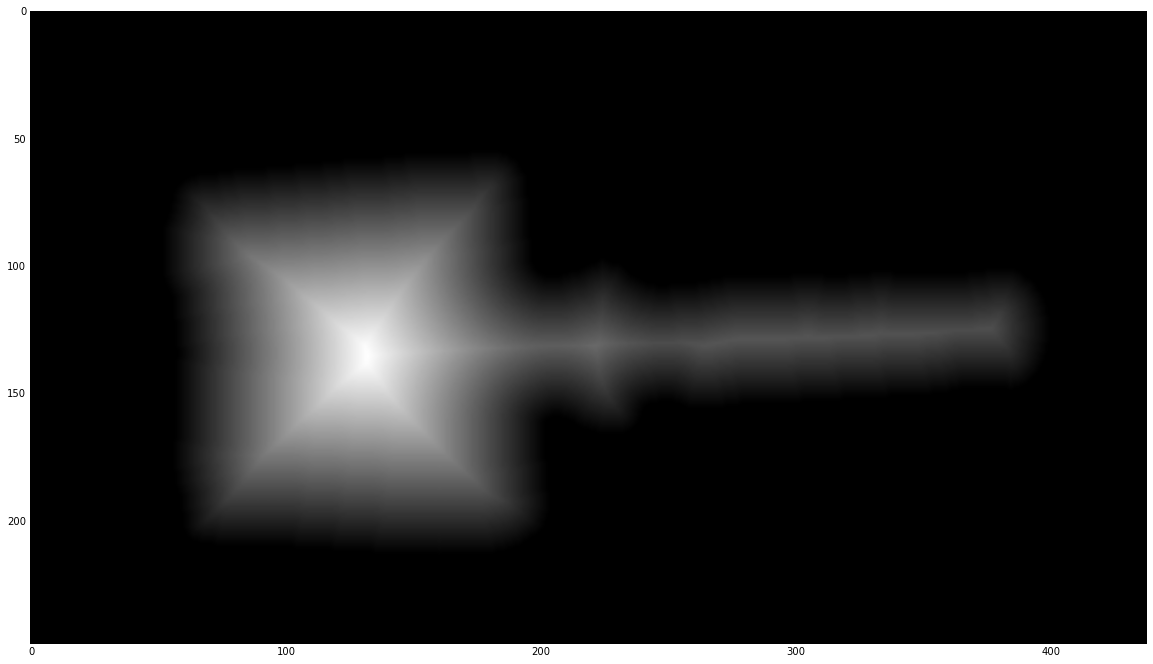

In [345]:
imshow(d, cmap=plt.cm.gray)

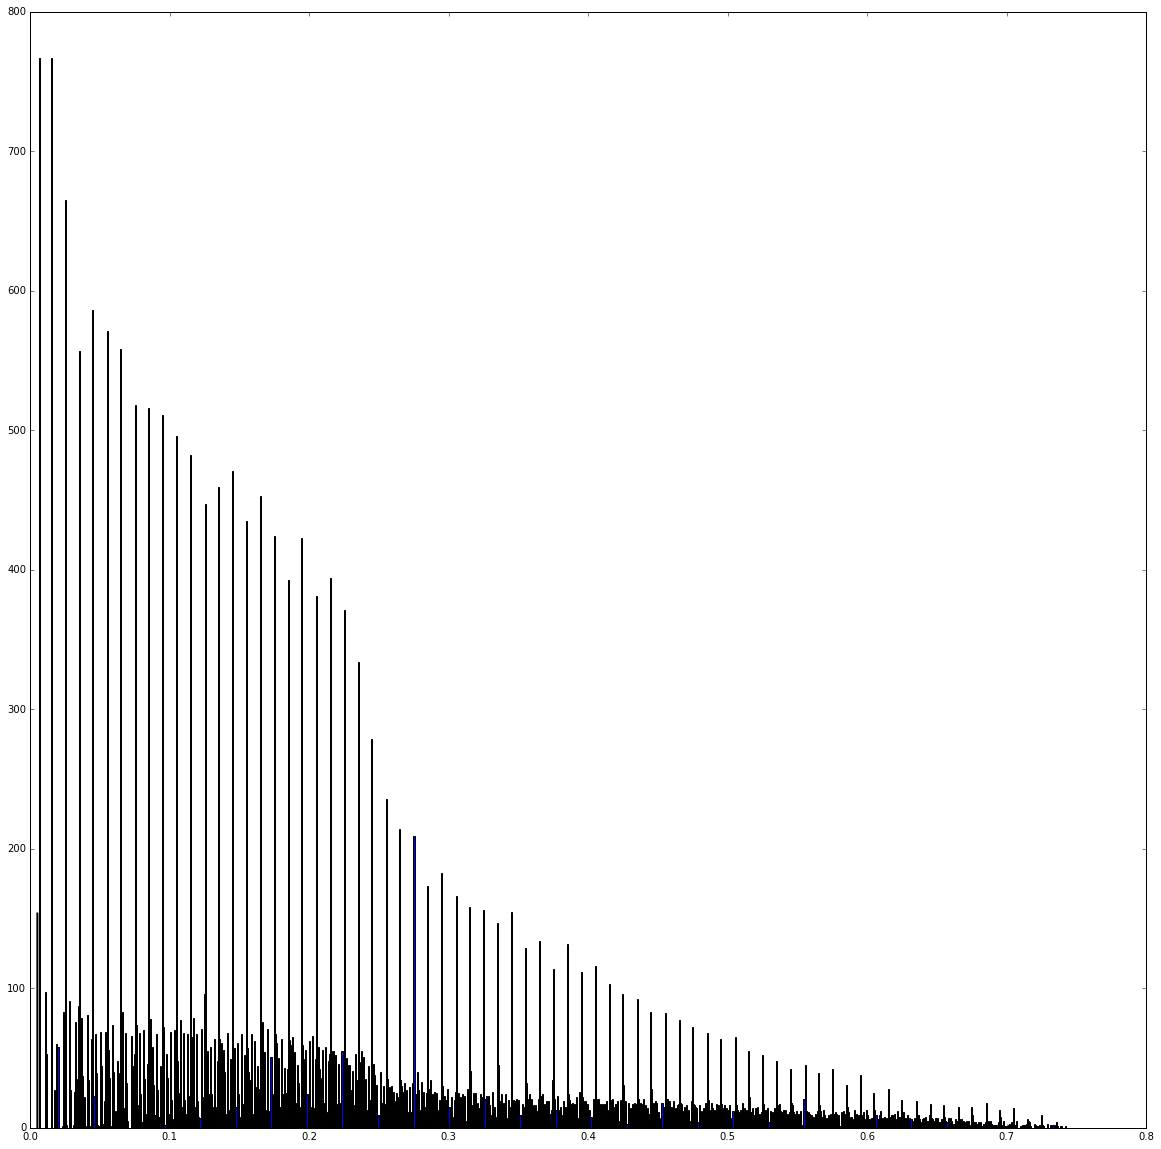

In [356]:
distances = d.flatten()
plt.hist(distances[distances != 0], bins=1000)
show()

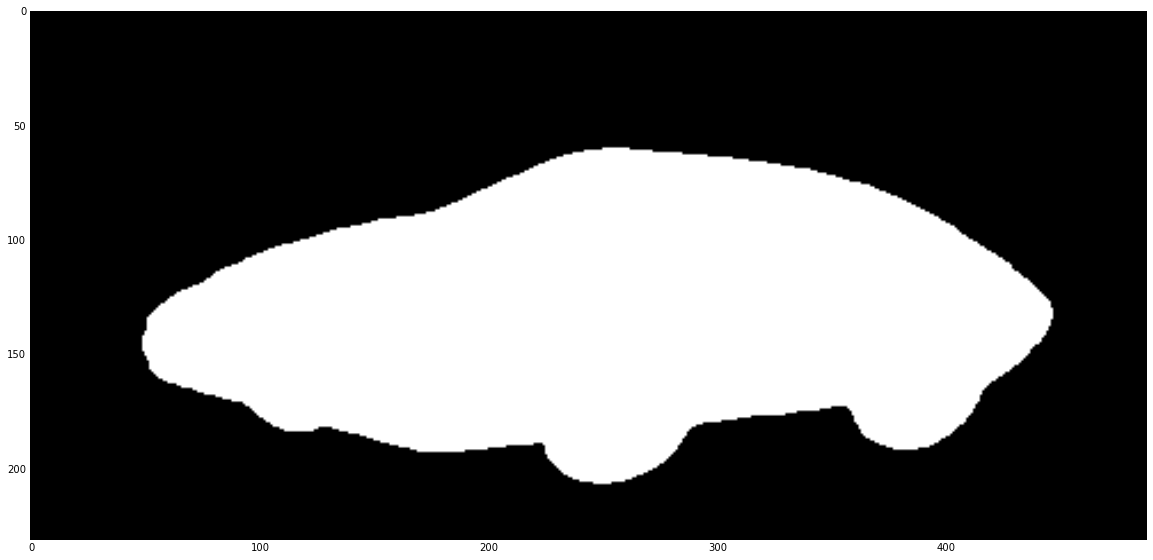

In [359]:
im2 = data_images[1]
imshow(im2, cmap=plt.cm.gray)
show()

In [553]:
border2 = trace_border(im4, connectivity=4)

(273, 585)
Start iteration of the algorithm... 


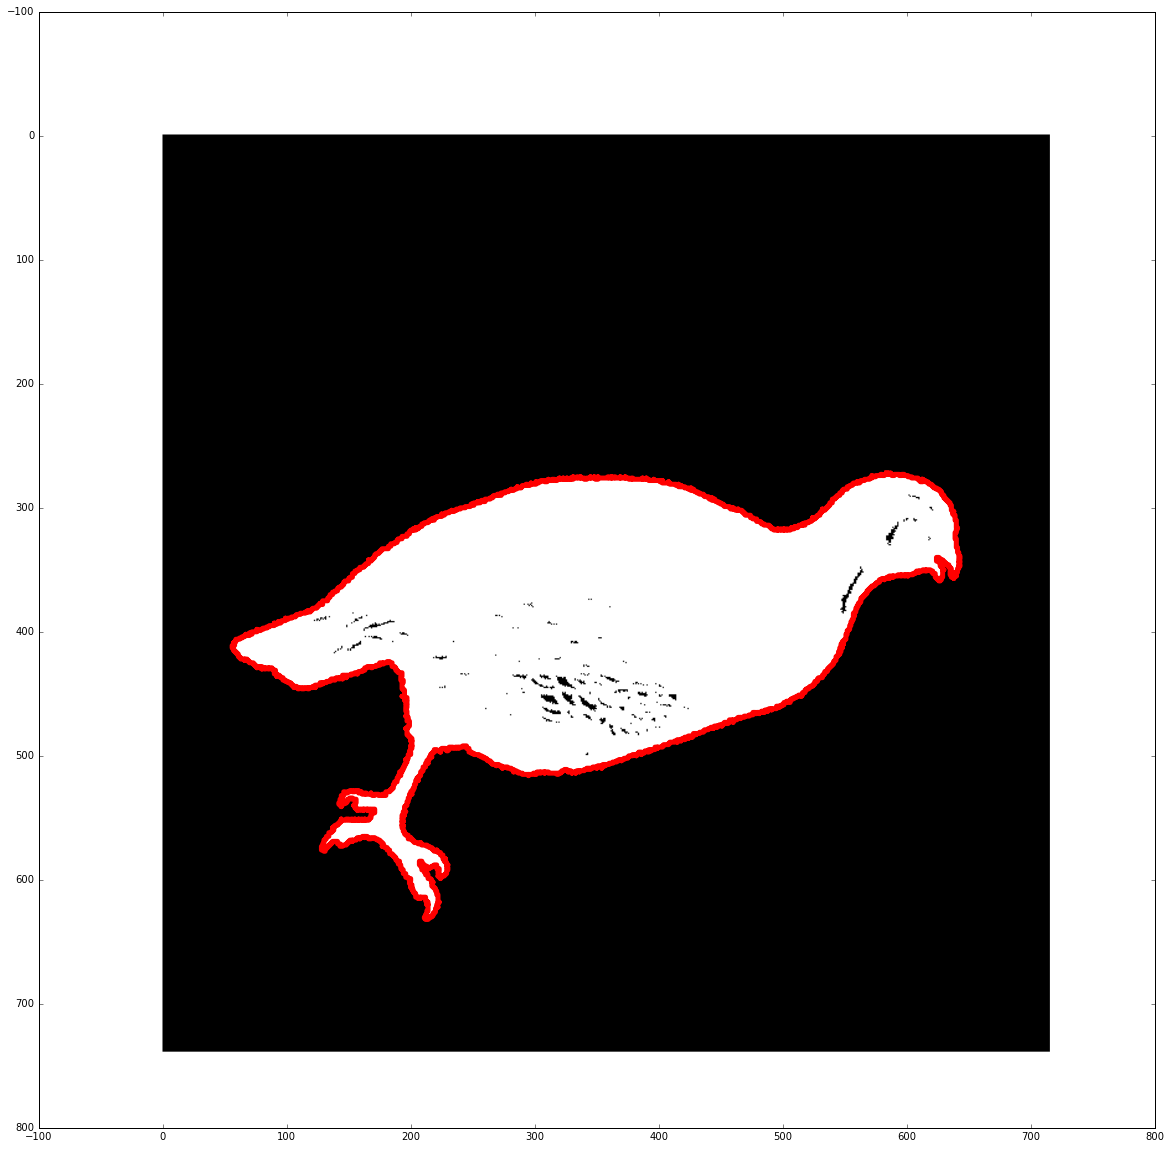

In [554]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im4, cmap=plt.cm.gray)

ax.plot([b[1] for b in border2], [b[0] for b in border2], color="r", linewidth=5)

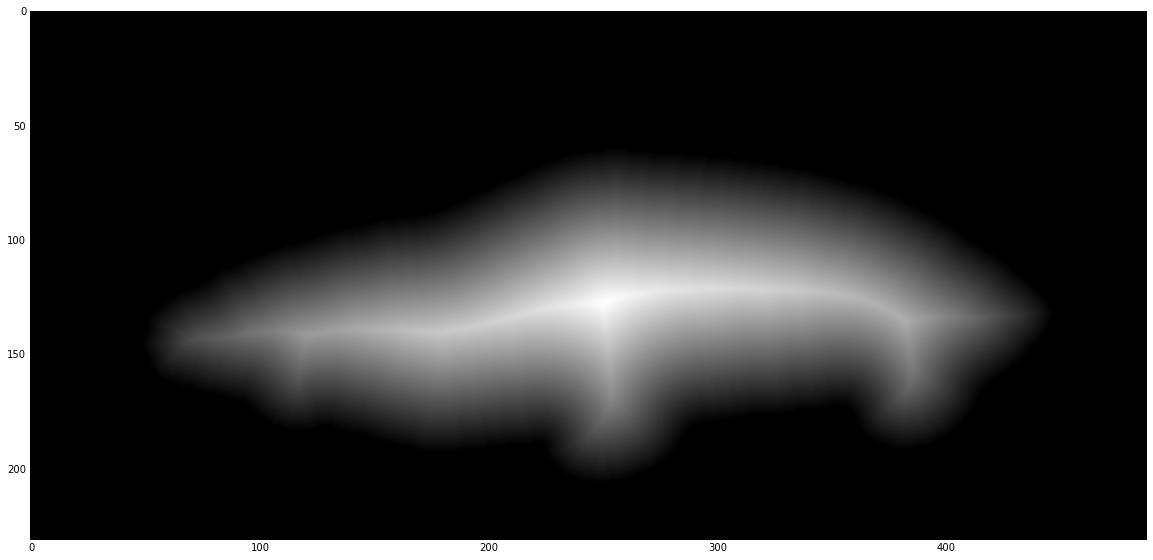

In [363]:
d2 = skfmm.distance(im2, dx=1e-2)
imshow(d2, cmap=plt.cm.gray)
show()

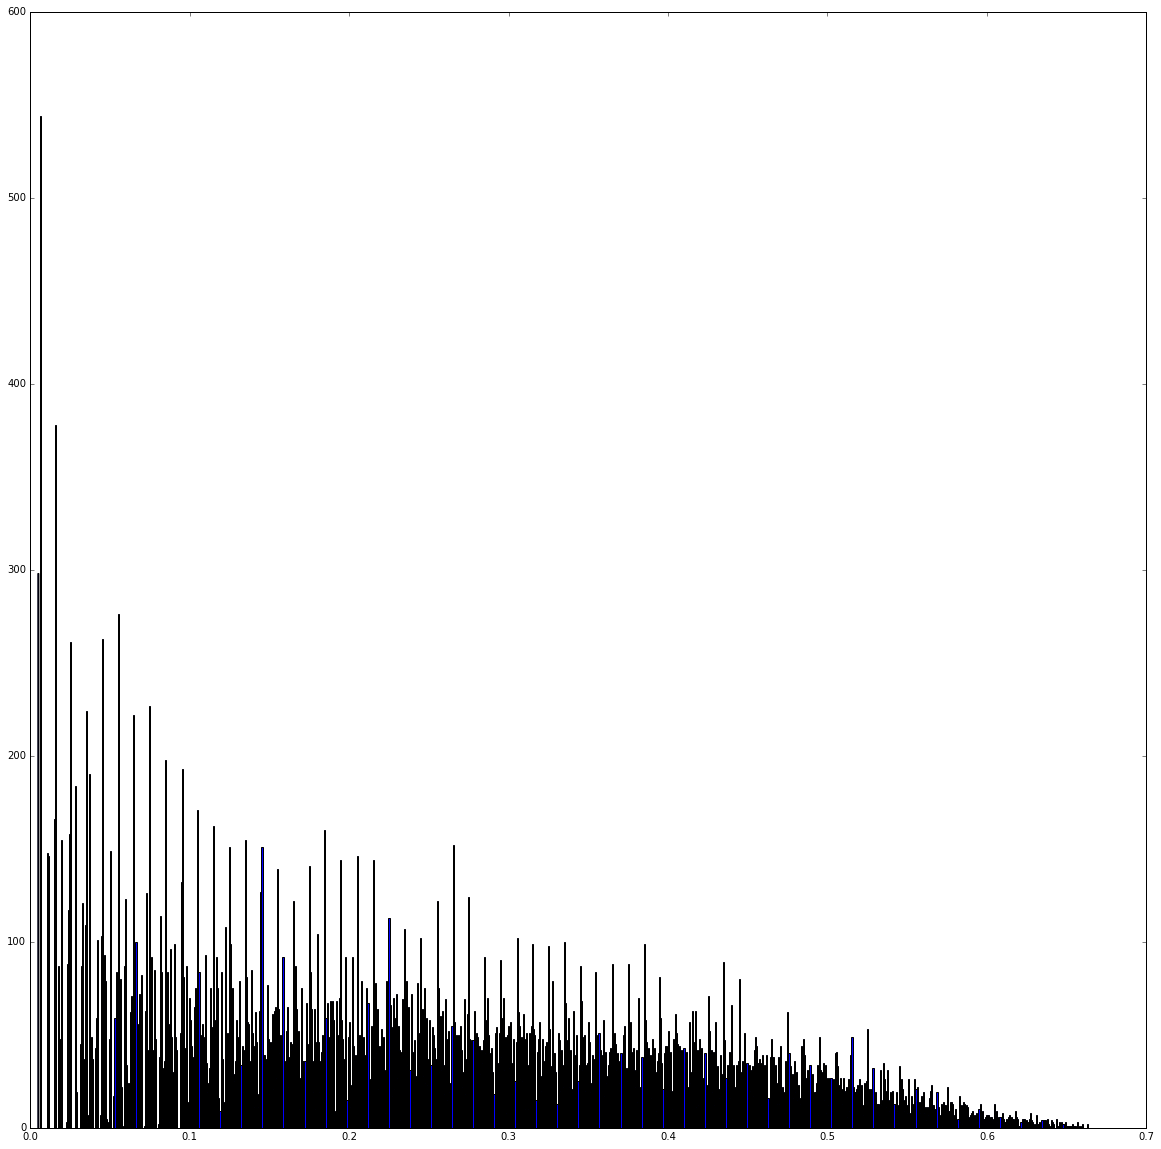

In [364]:
distances2 = d2.flatten()
plt.hist(distances2[distances2 != 0], bins=1000)
show()

In [382]:
?np.histogram

In [381]:
numpy.histogram(distances2, bins=50, weights=distances2)

(array([   8.36096904,   29.35488881,   37.57241745,   48.85135005,
          79.91915361,   81.59887399,   92.12762744,  127.42002975,
         119.29090099,  134.84668428,  168.6576356 ,  160.3697394 ,
         162.22747777,  203.82968354,  197.56848162,  210.47270757,
         232.4614628 ,  226.96328471,  233.23510541,  253.87691066,
         260.92837398,  251.24801031,  274.43818927,  281.96337383,
         281.41736918,  272.76056136,  316.55353181,  280.5506372 ,
         286.54979396,  325.5991656 ,  297.23346164,  288.36847904,
         323.98389113,  290.22207501,  279.90887356,  287.17333014,
         255.70687187,  236.65839693,  252.18886983,  219.05967417,
         181.54156202,  178.83456314,  140.37774306,  115.32372246,
         100.27685517,   76.05474885,   54.2683475 ,   42.82831672,
          28.2929324 ,   12.46329775]),
 array([ 0.        ,  0.0132642 ,  0.0265284 ,  0.03979261,  0.05305681,
         0.06632101,  0.07958521,  0.09284942,  0.10611362,  0.11937782

In [377]:
bin_means = (numpy.histogram(distances2, bins=50)[0] /
             numpy.histogram(distances2, bins=50)[0])

In [383]:
from scipy import interpolate

In [441]:
# sample points from the border
sample_indices = np.sort(numpy.random.choice(range(len(border)), size = 400))
sampled_border = [p for i, p in enumerate(border) if i in sample_indices]

In [445]:
?ax.plot

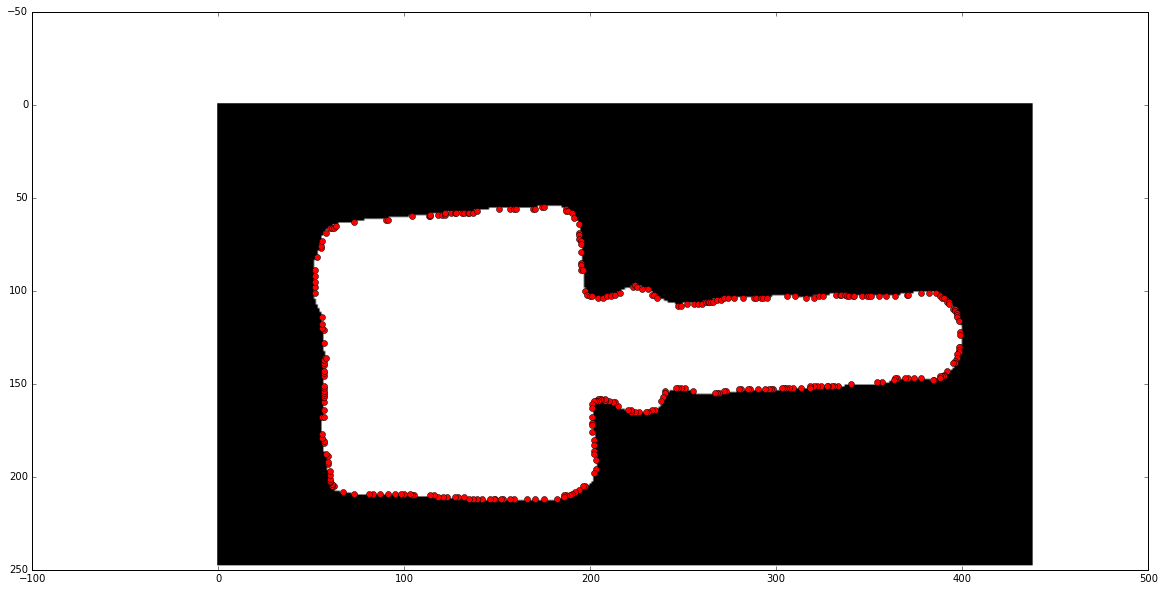

In [446]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)

ax.plot([b[1] for b in sampled_border], [b[0] for b in sampled_border], "ro", linewidth=1)

In [558]:
w = 5
i = 5
first_ders = []
second_ders = []
while (i != len(border) - 5):
    
    window = [border[i-5],
              border[i-4],
              border[i-3],
              border[i-2],
              border[i-1],
              border[i],
              border[i+1],
              border[i+2],
              border[i+3],
              border[i+4],
              border[i+5]]
    x = [p[1] for p in window]
    y = [p[0] for p in window]
    print(x)
    print(y)
    try:
        tck = interpolate.splrep(x, y, s=3)
        xnew = np.arange(min(x), max(x)+1, step=0.1)
        ynew = interpolate.splev(xnew, tck, der=0)
        first_der = interpolate.splev(border[i][1], tck, der=1)
        second_der = interpolate.splev(border[i][1], tck, der=2)

        if not np.isnan(first_der):
            first_ders.append(first_der)

        if not np.isnan(second_der):
            second_ders.append(second_der)

        print("First der: %f" % first_der)
        print("Second der: %f" % second_der)
    except ValueError:
        pass
        
    
#     plt.figure()
#     plt.plot(x, y, 'x', xnew, ynew)
#     plt.legend(['Linear', 'Cubic Spline'])
#     plt.title('Cubic-spline interpolation')
# #     plt.ylim()
#     plt.show()

    
    i += 1

[172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 184]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56]
First der: -0.019811
Second der: 0.038344
[176, 177, 178, 179, 180, 181, 182, 183, 184, 184, 185]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56]
First der: 0.010191
Second der: 0.073619
[177, 178, 179, 180, 181, 182, 183, 184, 184, 185, 186]
[55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56]
First der: 0.118508
Second der: 0.061474
[178, 179, 180, 181, 182, 183, 184, 184, 185, 186, 187]
[55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56]
First der: 0.217198
Second der: 0.028893
[179,

/home/johnpaul/anaconda/envs/venv/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:512: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/home/johnpaul/anaconda/envs/venv/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:512: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [469]:
from scipy import ndimage as ndi
from skimage.morphology import medial_axis


In [470]:
skel, distance = medial_axis(im, return_distance=True)
dist_on_skel = distance * skel

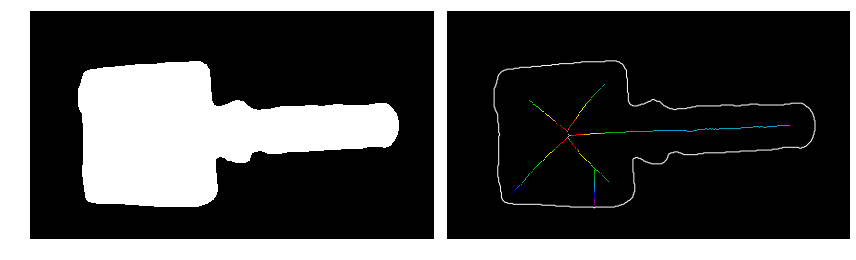

In [476]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(im, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


In [479]:
skel, distance = medial_axis(im2, return_distance=True)
dist_on_skel = distance * skel

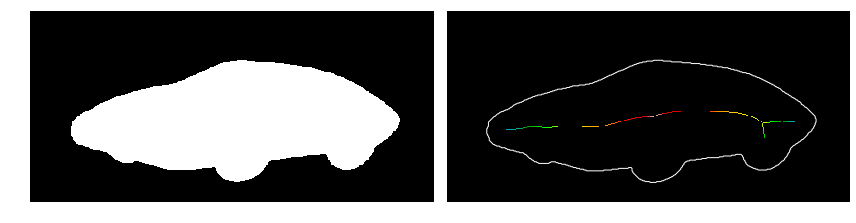

In [480]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(im2, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(im2, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


In [481]:
im3 = data_images[2]

In [507]:
skel, distance = medial_axis(im3, return_distance=True)
dist_on_skel1 = distance * skel

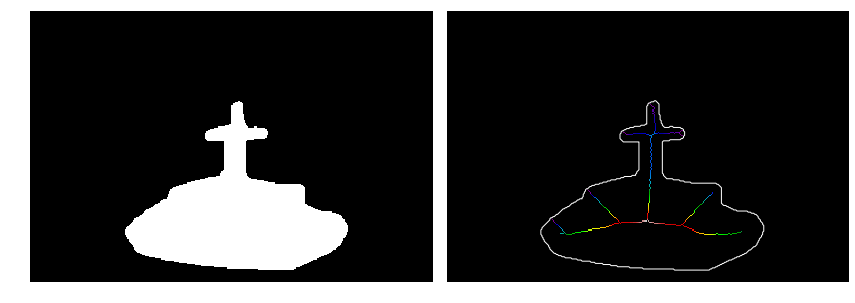

In [483]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(im3, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(im3, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


In [547]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
h, theta, d = hough_line(dist_on_skel1)
lines = probabilistic_hough_line(dist_on_skel1, threshold=10, line_length=5,
                                 line_gap=3)

In [548]:
for line in lines:
    a = np.array(line[0])
    b = np.array(line[1])
    print(numpy.linalg.norm(a-b))

8.0
30.1496268634
18.0
10.0
12.0415945788
40.7921561087
24.0
33.2415402772
49.0917508345
5.0
6.0
6.0827625303
22.627416998
7.0
8.0622577483
11.0
5.0
5.0
9.05538513814
6.0
6.0
13.0
9.0
5.38516480713
8.0
6.0
16.9705627485
18.3847763109


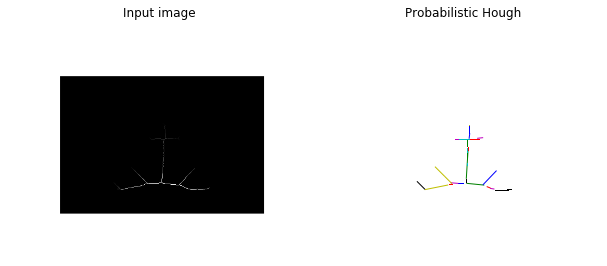

In [549]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.imshow(dist_on_skel1, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
plt.show()

10.0
27.2946881279
9.21954445729
6.7082039325
40.2616442784
15.5563491861
17.2626765016
9.0
6.32455532034
16.7630546142
10.0
18.0277563773
14.7648230602
5.0
28.0713376952
5.09901951359
22.627416998
6.0
15.2970585408
8.0622577483
6.32455532034
6.32455532034
5.0
21.0
14.1421356237
7.21110255093
49.040799341
14.0356688476
14.1421356237
5.83095189485
7.0
5.0
9.0
6.0827625303
35.5105618091
14.0
21.0
39.5979797464
38.3275357935
6.0
12.0415945788
17.691806013
41.1096095822
19.6468827044
6.0
8.60232526704
10.0
18.6815416923
30.5941170816
24.1867732449
13.3416640641
9.0
9.89949493661
11.1803398875
13.0384048104
5.0
6.32455532034
10.295630141
7.21110255093
5.0
37.3630833845
7.07106781187
5.38516480713
21.9544984001
8.0
8.94427191
23.0217288664
5.83095189485
10.1980390272
16.0312195419
5.83095189485
5.38516480713
10.1980390272
9.48683298051
11.313708499
5.09901951359
23.769728648
26.4007575649
14.0356688476
7.07106781187
7.07106781187
12.0
20.0249843945
33.941125497
6.0
5.09901951359
10.198039027

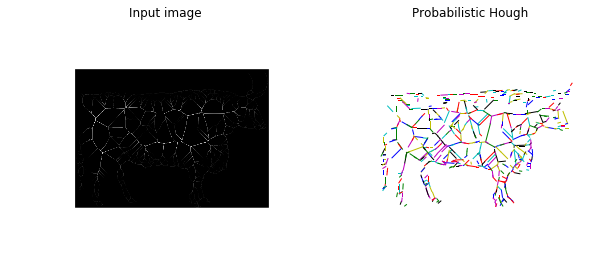

In [552]:
h, theta, d = hough_line(dist_on_skel2)
lines2 = probabilistic_hough_line(dist_on_skel2, threshold=10, line_length=5,
                                 line_gap=3)

for line in lines2:
    a = np.array(line[0])
    b = np.array(line[1])
    print(numpy.linalg.norm(a-b))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.imshow(dist_on_skel2, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

for line in lines2:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
plt.show()

In [687]:

skel, distance = medial_axis(new_im, return_distance=True)
dist_on_skel = distance * skel

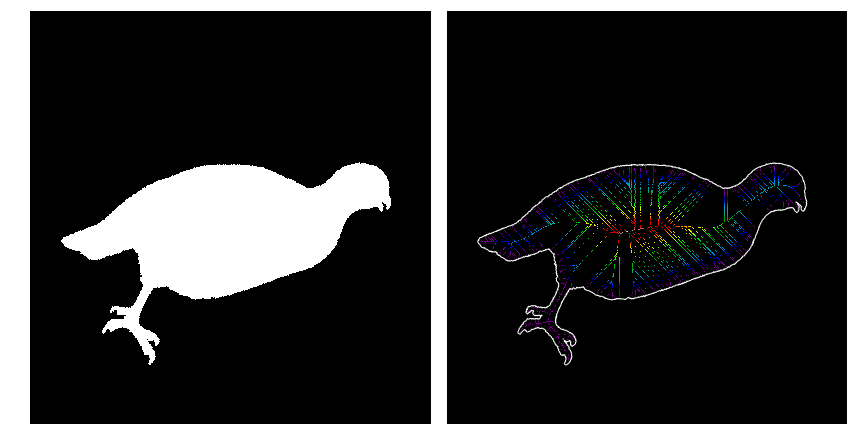

In [688]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(new_im, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(new_im, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


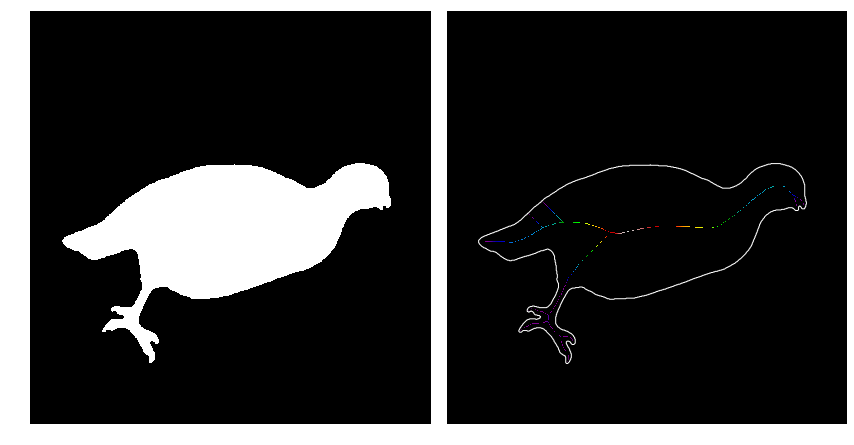

In [711]:
from skimage.filters.rank import median
from skimage.morphology import disk

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})

new_im_nonoise = numpy.array(new_im)
new_im_nonoise = median(new_im_nonoise, disk(5))

skel, distance = medial_axis(new_im_nonoise, return_distance=True)
dist_on_skel = distance * skel

ax1.imshow(new_im_nonoise, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(new_im_nonoise, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


In [506]:
im5 = data_images[4]
skel, distance = medial_axis(im5, return_distance=True)
dist_on_skel2 = distance * skel

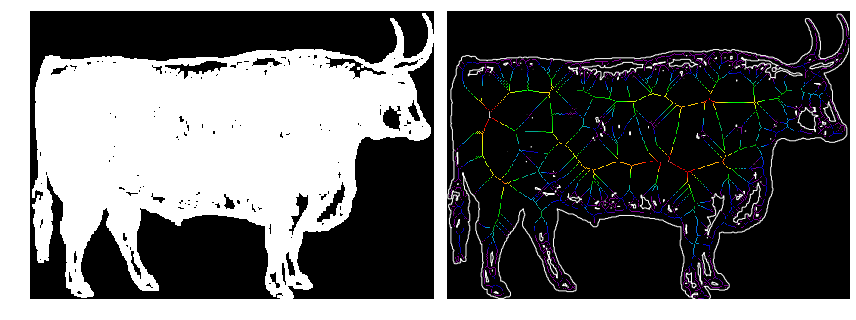

In [488]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(im5, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(im5, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()


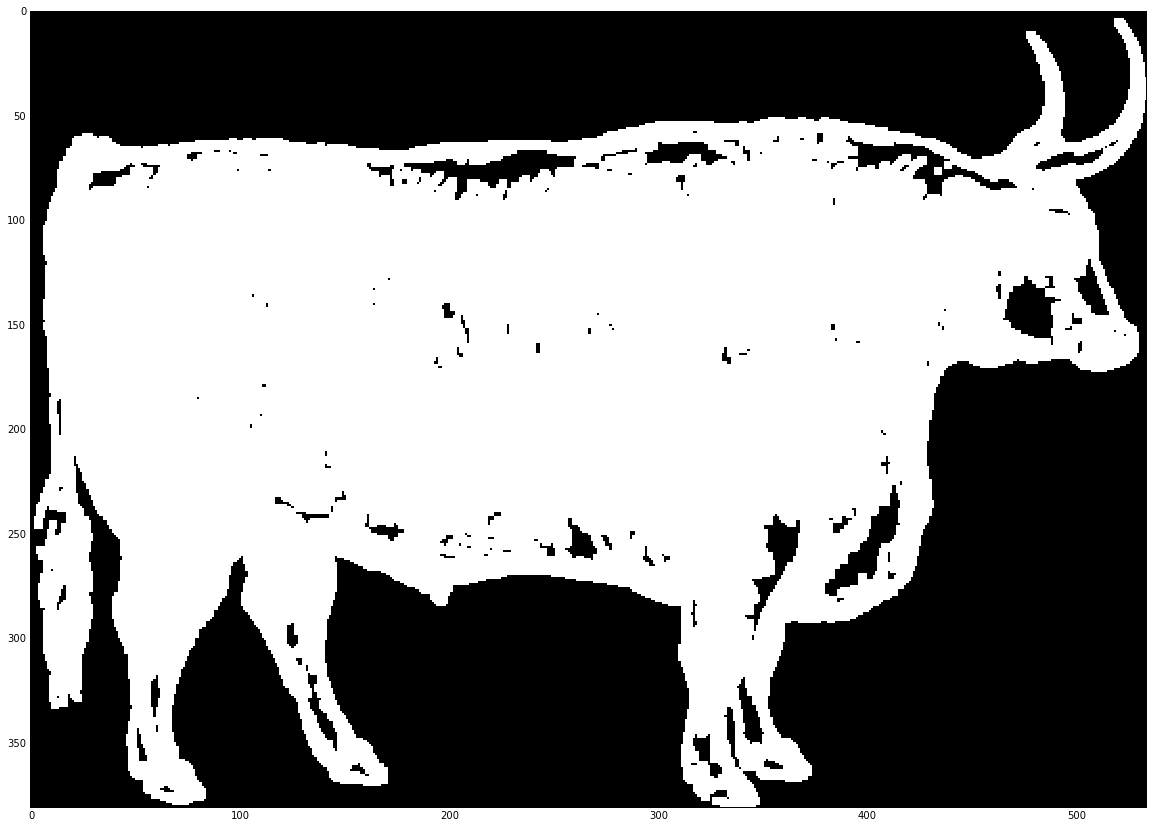

In [714]:
cow = data_images[4]
imshow(cow)

(5, 519)
Start iteration of the algorithm... 
Now find inside points...


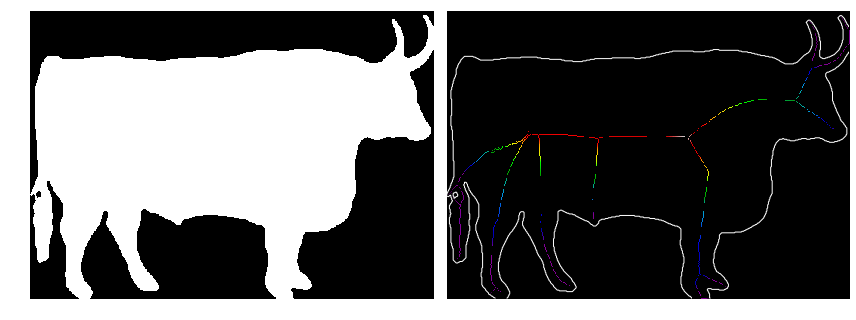

In [715]:
cow = data_images[4]

# White filling
border = trace_border(cow, connectivity=4)

print("Now find inside points...")
new_im2 = cow
new_im2 = add_point_inside(new_im2, border, (200, 200))
make_grey_white(new_im2)



# NO noise + skel

from skimage.filters.rank import median
from skimage.morphology import disk

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})

new_im_nonoise = numpy.array(new_im2)
new_im_nonoise = median(new_im_nonoise, disk(5))

skel, distance = medial_axis(new_im_nonoise, return_distance=True)
dist_on_skel = distance * skel

ax1.imshow(new_im_nonoise, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(new_im_nonoise, [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()

In [509]:
np.histogram(dist_on_skel2.flatten()[dist_on_skel.flatten() != 0.], bins=100, density=True)

(array([ 0.06185848,  0.        ,  0.11034215,  0.04155743,  0.13183738,
         0.05493224,  0.12180627,  0.04346812,  0.1466452 ,  0.04227394,
         0.08383137,  0.02006221,  0.06806821,  0.02674961,  0.05063319,
         0.02794379,  0.04370696,  0.01695734,  0.04728949,  0.02245057,
         0.02221173,  0.01647967,  0.02913797,  0.01218063,  0.0226894 ,
         0.01719618,  0.02053988,  0.01552433,  0.0253166 ,  0.01528549,
         0.02030105,  0.01433015,  0.01982337,  0.01218063,  0.01791269,
         0.01815152,  0.01624084,  0.01456899,  0.02077872,  0.01743502,
         0.01170296,  0.01337481,  0.01647967,  0.01289713,  0.01647967,
         0.00979227,  0.01409131,  0.00979227,  0.01552433,  0.01456899,
         0.01146412,  0.01241946,  0.01480782,  0.01098645,  0.00979227,
         0.01313597,  0.00525439,  0.01456899,  0.00883693,  0.01743502,
         0.00788158,  0.01409131,  0.00764275,  0.01194179,  0.01170296,
         0.01456899,  0.0093146 ,  0.01528549,  0.0

In [508]:
np.histogram(dist_on_skel2.flatten()[dist_on_skel.flatten() != 0.], bins=100, density=True)

(array([ 0.06185848,  0.        ,  0.11034215,  0.04155743,  0.13183738,
         0.05493224,  0.12180627,  0.04346812,  0.1466452 ,  0.04227394,
         0.08383137,  0.02006221,  0.06806821,  0.02674961,  0.05063319,
         0.02794379,  0.04370696,  0.01695734,  0.04728949,  0.02245057,
         0.02221173,  0.01647967,  0.02913797,  0.01218063,  0.0226894 ,
         0.01719618,  0.02053988,  0.01552433,  0.0253166 ,  0.01528549,
         0.02030105,  0.01433015,  0.01982337,  0.01218063,  0.01791269,
         0.01815152,  0.01624084,  0.01456899,  0.02077872,  0.01743502,
         0.01170296,  0.01337481,  0.01647967,  0.01289713,  0.01647967,
         0.00979227,  0.01409131,  0.00979227,  0.01552433,  0.01456899,
         0.01146412,  0.01241946,  0.01480782,  0.01098645,  0.00979227,
         0.01313597,  0.00525439,  0.01456899,  0.00883693,  0.01743502,
         0.00788158,  0.01409131,  0.00764275,  0.01194179,  0.01170296,
         0.01456899,  0.0093146 ,  0.01528549,  0.0

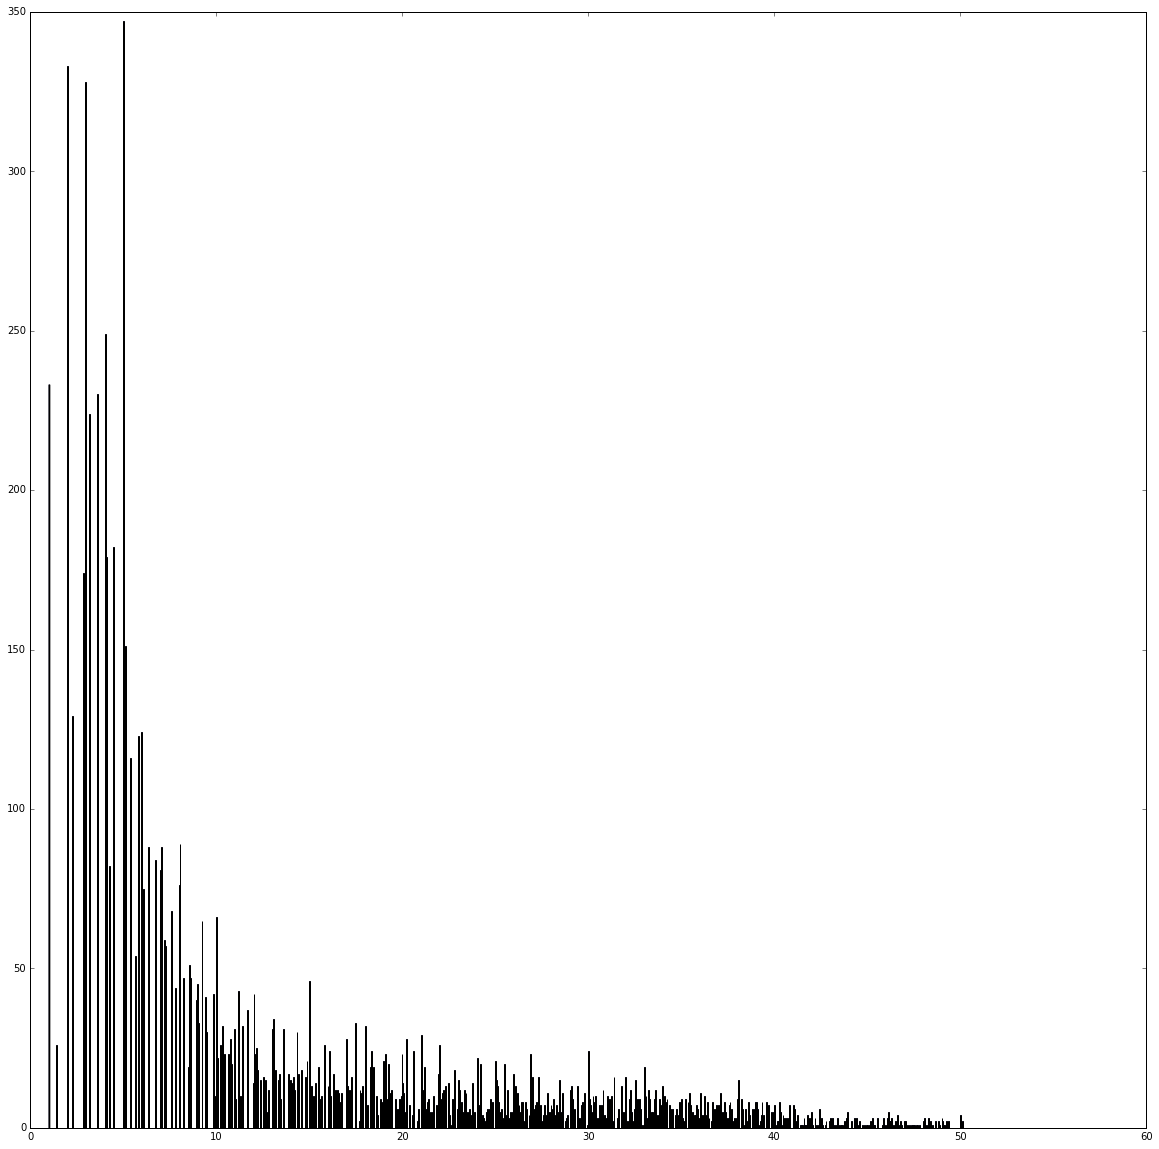

In [502]:
plt.hist(dist_on_skel.flatten()[dist_on_skel.flatten() != 0.], bins=1000)
show()

In [559]:
len(border)

1073

In [560]:
len(first_ders)

370

In [299]:
def indexing(data):
    """This function vectorizes the images with our implemented indexing method."""
#   here we can include contour finding
#   and all other things we do to find img description
#   should return np.appay that is of the same size (?) for all images
#   and each row represents image features
#   so later we can just pass it to the classifier 
    pass

In [110]:
# Later we would do:

In [106]:
# X = indexing(data_images)
# y = np.array(data_labels)

In [109]:
# clf = OneVsRestClassifier(GaussianNB())
# clf.fit(X, y)